<a href="https://colab.research.google.com/github/luguitar/ML_Books/blob/master/Care11_Yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
acoes = ['CARE11.SA','ENBR3.SA' ,'SAPR4.SA', 'ITSA4.SA', 'BOVA11.SA']
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i, period='1y')['Adj Close']
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CARE11.SA,ENBR3.SA,SAPR4.SA,ITSA4.SA,BOVA11.SA
Date,,,,,
2021-04-12,0.59,17.166817,4.017666,9.121836,114.400002
2021-04-13,0.57,17.221170,4.008213,9.103965,114.669998
2021-04-14,0.56,16.849752,3.951493,9.166506,115.599998
2021-04-15,0.57,16.985636,3.960947,9.166506,116.199997
2021-04-16,0.56,17.212112,4.055480,9.202242,116.459999
...,...,...,...,...,...
2022-04-06,3.98,22.219999,4.040000,10.360000,113.870003
2022-04-07,3.97,22.090000,4.060000,10.270000,114.650002
2022-04-08,3.90,21.990000,4.130000,10.270000,113.980003


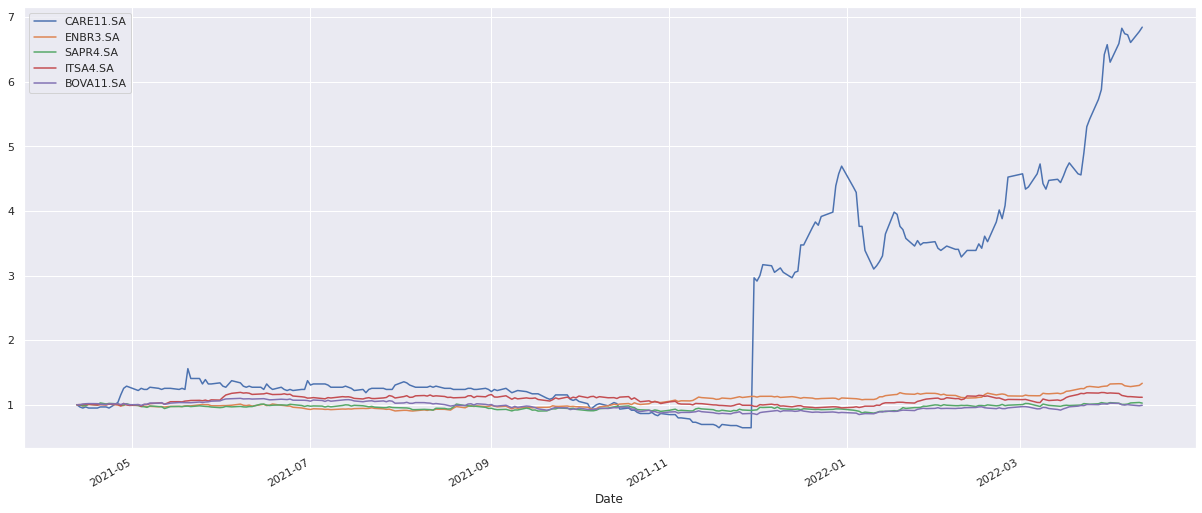

In [ ]:
sns.set()
carteira_normalizada = carteira/carteira.iloc[0]
carteira_normalizada.plot(figsize=(21,9))

In [ ]:
retorno = carteira.pct_change()
retorno

,CARE11.SA,ENBR3.SA,SAPR4.SA,ITSA4.SA,BOVA11.SA
Date,,,,,
2021-04-12,NaN,NaN,NaN,NaN,NaN
2021-04-13,-0.033898,0.003166,-0.002353,-0.001959,0.002360
2021-04-14,-0.017544,-0.021568,-0.014151,0.006870,0.008110
2021-04-15,0.017857,0.008064,0.002392,0.000000,0.005190
2021-04-16,-0.017544,0.013333,0.023866,0.003899,0.002238
...,...,...,...,...,...
2022-04-06,-0.012407,-0.021816,0.000000,-0.007663,-0.005589
2022-04-07,-0.002513,-0.005851,0.004950,-0.008687,0.006850
2022-04-08,-0.017632,-0.004527,0.017241,0.000000,-0.005844


In [ ]:
retorno_anual = retorno.mean() * 264
retorno_anual

CARE11.SA    4.445567
ENBR3.SA     0.323795
SAPR4.SA     0.052302
ITSA4.SA     0.145820
BOVA11.SA    0.011318
dtype: float64

In [ ]:
cov = retorno.cov() * 264
cov

,CARE11.SA,ENBR3.SA,SAPR4.SA,ITSA4.SA,BOVA11.SA
CARE11.SA,14.161511,0.001714,0.023558,-0.056647,-0.011134
ENBR3.SA,0.001714,0.040776,0.025297,0.019328,0.019234
SAPR4.SA,0.023558,0.025297,0.051938,0.021723,0.023276
ITSA4.SA,-0.056647,0.019328,0.021723,0.060108,0.035498
BOVA11.SA,-0.011134,0.019234,0.023276,0.035498,0.039362


In [ ]:
corr = retorno.corr()
corr

,CARE11.SA,ENBR3.SA,SAPR4.SA,ITSA4.SA,BOVA11.SA
CARE11.SA,1.000000,0.002255,0.027469,-0.061398,-0.014913
ENBR3.SA,0.002255,1.000000,0.549698,0.390403,0.480106
SAPR4.SA,0.027469,0.549698,1.000000,0.388782,0.514782
ITSA4.SA,-0.061398,0.390403,0.388782,1.000000,0.729790
BOVA11.SA,-0.014913,0.480106,0.514782,0.729790,1.000000


In [ ]:
num_acoes = len(acoes)
num_carteiras = 1000000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [ ]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [ ]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,CARE11.SA Peso,ENBR3.SA Peso,SAPR4.SA Peso,ITSA4.SA Peso,BOVA11.SA Peso
0,1.633584,1.258840,1.297690,0.332868,0.453008,0.106384,0.002481,0.105259
1,1.537967,1.227665,1.252758,0.325170,0.171012,0.200759,0.171747,0.131312
2,1.062329,0.781423,1.359479,0.205005,0.312567,0.195607,0.269735,0.017086
3,1.154568,0.872088,1.323912,0.229343,0.281189,0.248989,0.209779,0.030700
4,1.693732,1.373997,1.232704,0.365056,0.049996,0.030234,0.347973,0.206740
...,...,...,...,...,...,...,...,...
999995,0.694326,0.538179,1.290139,0.137067,0.128346,0.392463,0.141476,0.200648
999996,0.676108,0.493604,1.369739,0.125706,0.227389,0.064810,0.250312,0.331783
999997,0.776071,0.560044,1.385733,0.144246,0.244136,0.199478,0.302377,0.109764
999998,0.483020,0.377893,1.278192,0.090592,0.125993,0.414475,0.101380,0.267560


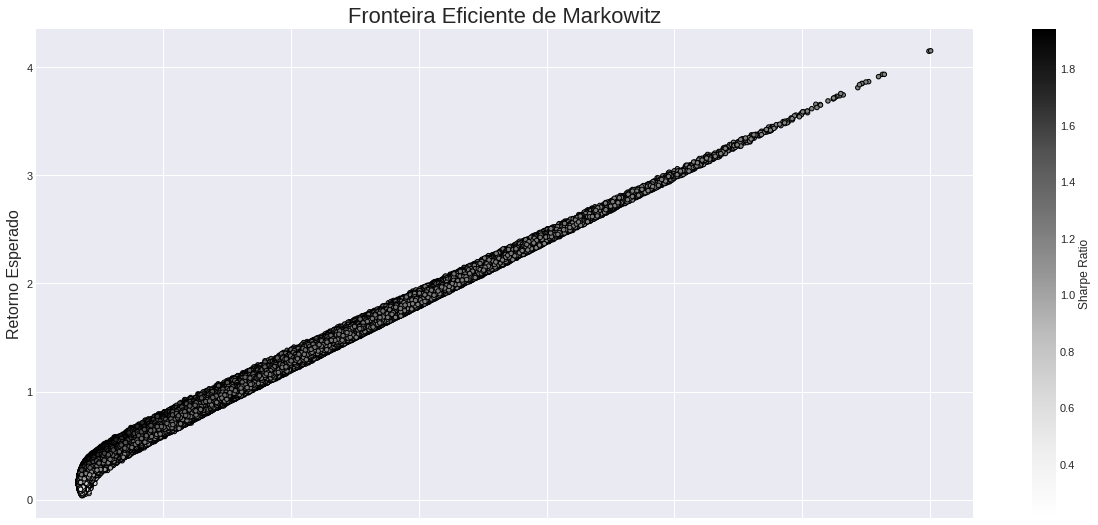

In [ ]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

AttributeError: ignored

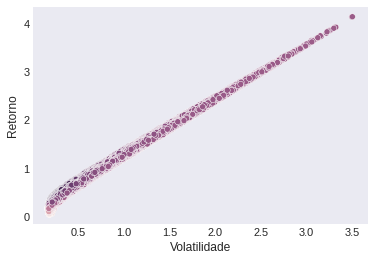

In [ ]:
sns.scatterplot(x = 'Volatilidade', y = 'Retorno', hue = 'Sharpe Ratio', data = portfolios, legend=None)
sns.set_xticklabels('Volatilidade', fontsize = 16)
sns.set_yticklabels('Retorno Esperado', fontsize = 16)
sns.set_title('Fronteira Eficiente de Markowitz', fontsize = 22)

In [ ]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,470667
Retorno,-0.064005
Volatilidade,0.096210
Sharpe Ratio,-0.665264
LIGT3.SA Peso,0.002248
SAPR4.SA Peso,0.089626
ITSA4.SA Peso,0.096310
MXRF11.SA Peso,0.811816


In [ ]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,183977
Retorno,0.201449
Volatilidade,0.231958
Sharpe Ratio,0.868472
LIGT3.SA Peso,0.001087
SAPR4.SA Peso,0.028648
ITSA4.SA Peso,0.935684
MXRF11.SA Peso,0.034581
